In [1]:
pip install geopandas

     |████████████████████████████████| 931kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 14.0MB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 11.0MB 3.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e4/be/30a58b4b0733850280d01f8bd132591b4668ed5c7046761098d665ac2174/cligj-0.5.0-py3-none-any.whl
     |████████████████████████████████| 92kB 6.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/a2/db/4313ab3be961f7a763066401fb77f7748373b6094076ae2bda2806988af6/attrs-19.3.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# set filepath
fp = "/Users/luyc/Desktop/Automated GIS python/exercise 2/data/DAMSELFISH_distributions.shp"

In [9]:
import geopandas as gpd

# Read file using gpd.read_file()
data = gpd.read_file(fp)

data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


In [18]:
pip install matplotlib

SyntaxError: invalid syntax (<ipython-input-18-33051465c70d>, line 1)

In [19]:
pip install descartes

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


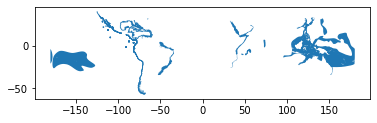

In [20]:
import matplotlib as mat
import descartes
data.plot()

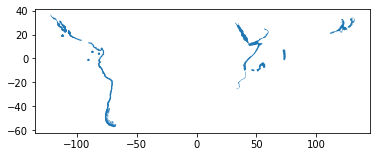

In [23]:
# Create a output path for the data
out = r"/Users/luyc/Desktop/Automated GIS python/exercise 2/data/DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out)

selection.plot()

In [24]:
# iterate over the selected rows
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001
Polygon area at index 5 is: 0.000
Polygon area at index 6 is: 2.732
Polygon area at index 7 is: 2.655
Polygon area at index 8 is: 2.382
Polygon area at index 9 is: 0.536
Polygon area at index 10 is: 0.340
Polygon area at index 11 is: 0.012
Polygon area at index 12 is: 0.000
Polygon area at index 13 is: 0.000
Polygon area at index 14 is: 27.348
Polygon area at index 15 is: 10.479
Polygon area at index 16 is: 2.697
Polygon area at index 17 is: 10.749
Polygon area at index 18 is: 87.246
Polygon area at index 19 is: 0.001
Polygon area at index 20 is: 0.000
Polygon area at index 21 is: 113.242
Polygon area at index 22 is: 18.438
Polygon area at index 23 is: 16.438
Polygon area at index 24 is: 0.000
Polygon area at index 25 is: 4.811
Polygon area at index 26 is: 2.697
Polygon area at index 27 is: 38.671
Polygon area at ind

In [26]:
# add field
data['area']=data.area
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

In [31]:
# Max area
max_area = data['area'].max()

# Mean area
mean_area = data['area'].mean()

# format print
print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

Max area: 1493.2
Mean area: 19.96


In [36]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

# create new empty dataframe
newdata = gpd.GeoDataFrame()

# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry']=None

# add data
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coordinates)

newdata.loc[0,'geometry']=poly
newdata.loc[0,'Location']='Senaatintori'

In [38]:
# add projection system
from fiona.crs import from_epsg
# wgs84
newdata.crs = from_epsg(4326)
newdata.crs

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
outfp = r"/Users/luyc/Desktop/Automated GIS python/exercise 2/data/Senaatintori.shp"
newdata.to_file(out)

In [40]:
# Group the data by column 'BINOMIAL'
grouped = data.groupby('BINOMIAL')

# Iterate over the group object
for key, values in grouped:
    individual_fish = values
    
# Determine outputpath
outFolder = r"/home/geo/Data"

# Create a new folder called 'Results' (if does not exist) to that folder using os.makedirs() function
resultFolder = os.path.join(outFolder, 'Results')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

# Iterate over the
for key, values in grouped:
    # Format the filename (replace spaces with underscores)
    outName = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(resultFolder, outName)

    # Export the data
    values.to_file(outpath)

NameError: name 'os' is not defined